Convolutional Neural Network (CNN) using TensorFlow and Keras on the CIFAR-10 dataset.

Steps:

*   Load and preprocess the CIFAR-10 dataset
*   Define the CNN model
*   Compile the model
*   Train the model
*   Evaluate the model
*   Make predictions


In [2]:
# Import Library
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [21]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

The CIFAR-10 dataset is loaded using
 "datasets.cifar10.load_data()".

In [4]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# Verify the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


A few images from the training set are displayed with their corresponding labels to ensure the data is loaded correctly

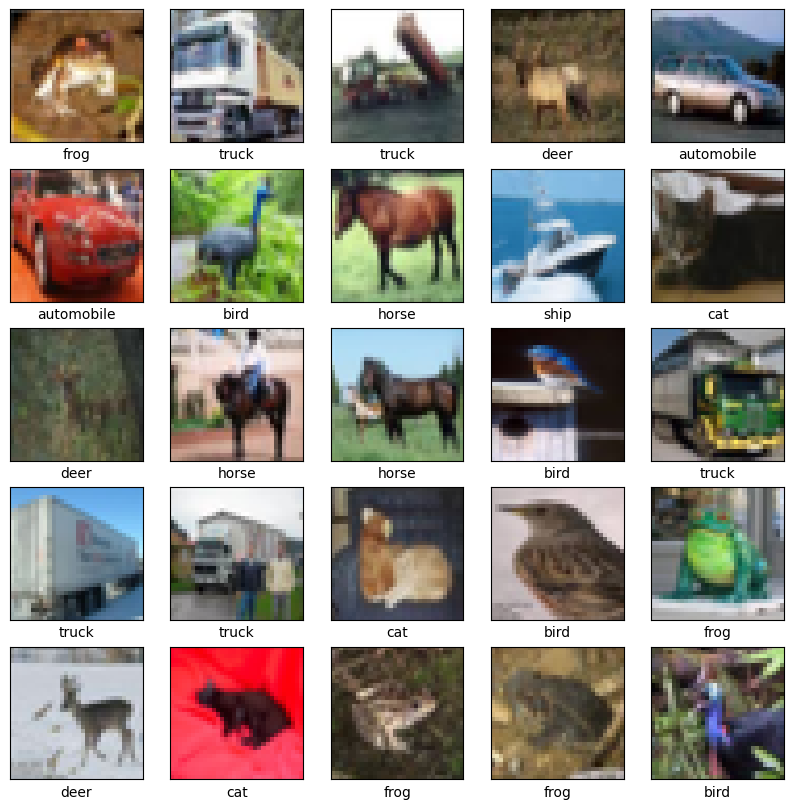

In [7]:
# Plot the first few images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels are arrays, which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [8]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



*  A sequential model is defined with three convolutional layers followed by max-pooling layers.

*   The final layers include a flattening layer, a dense layer with 64 units, and a dense output layer with 10 units (one for each class) with a softmax activation function.



In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss function.

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5461 - accuracy: 0.4377 - val_loss: 1.2686 - val_accuracy: 0.5366
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1636 - accuracy: 0.5875 - val_loss: 1.0905 - val_accuracy: 0.6152
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0130 - accuracy: 0.6446 - val_loss: 1.0180 - val_accuracy: 0.6336
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9206 - accuracy: 0.6773 - val_loss: 0.9801 - val_accuracy: 0.6540
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8429 - accuracy: 0.7059 - val_loss: 0.8981 - val_accuracy: 0.6872
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7879 - accuracy: 0.7227 - val_loss: 0.8997 - val_accuracy: 0.6872
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7380 - accuracy: 0.7411 - val_loss: 0.9202 - val_accuracy

The model is trained for 10 epochs with training and validation data.


*   An epoch is one complete pass through the entire training dataset. During an epoch, the model processes each image in the training dataset once.
*   Training for multiple epochs means the model is exposed to the training data multiple times, which helps the model learn and improve its performance.



In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - loss: 0.8994 - accuracy: 0.7011 - 653ms/epoch - 2ms/step

Test accuracy: 0.7010999917984009


The model's performance is evaluated on the test set, and the test accuracy is printed.


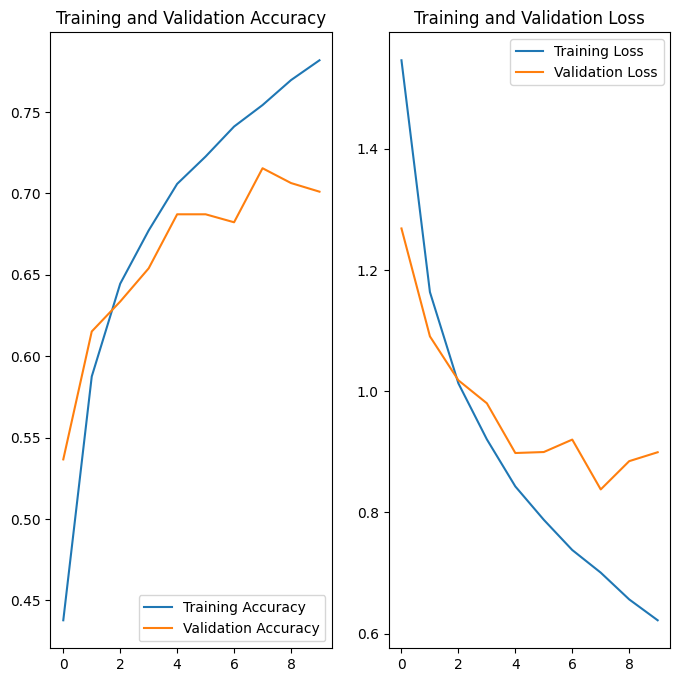

In [12]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
# Function to make predictions on new images
def predict_images(images):
    predictions = model.predict(images)
    predicted_classes = [class_names[np.argmax(prediction)] for prediction in predictions]
    return predicted_classes

A function predict_image is defined to make predictions on new images. The function resizes the image, normalizes it, and makes a prediction using the trained model.

In [32]:
# Select a 5 images from the test set
num_images_to_predict = 5
test_images = x_test[:num_images_to_predict]
test_labels = y_test[:num_images_to_predict]

In [33]:
# Make predictions
predicted_classes = predict_images(test_images)


1/1 [==============================] - 0s 24ms/step


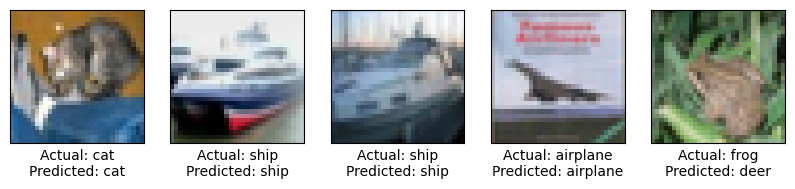

In [34]:
# Display the images with predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(num_images_to_predict):
    plt.subplot(1, num_images_to_predict, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    actual_class = class_names[test_labels[i][0]]
    predicted_class = predicted_classes[i]
    plt.xlabel(f'Actual: {actual_class}\nPredicted: {predicted_class}')
plt.show()